

<h1> Анализ данных о продажах и рейтинге компьтерных игр на данных из открытых источников.</h1>


<b> Краткое описание проекта</b>

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

В ходе исследования предстоит выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


<b>Описание данных.</b>
    
Перед нами данные до 2016 года. Файл games.csv содержит столбцы следующего содержания:


Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

<b> План работы </b>

1. Открыть файл и изучить общую информацию;
2. Провести предварительную обработку данных: заменить названия столбцов, изменить типы данных там где требуется, заполнить пропуски, удалить дубликаты, если потребуется, посчитать и добавить информацию о суммарных продажах;
3. Провести исследовательский анализ данных;
4. Составить портреты пользователей;
5. Выдвинуть и проверить статистические гипотезы;
6. Написать общий вывод.






In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import statistics

**Шаг 1. Открываем файл с данными и изучаем общую информацию**

In [4]:
games=pd.read_csv('games.csv')

In [5]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
for column in games:
    print ('Процент пропущенных значений в столбце ',column,round(games[column].isna().sum()/len(games)*100,2))

Процент пропущенных значений в столбце  Name 0.01
Процент пропущенных значений в столбце  Platform 0.0
Процент пропущенных значений в столбце  Year_of_Release 1.61
Процент пропущенных значений в столбце  Genre 0.01
Процент пропущенных значений в столбце  NA_sales 0.0
Процент пропущенных значений в столбце  EU_sales 0.0
Процент пропущенных значений в столбце  JP_sales 0.0
Процент пропущенных значений в столбце  Other_sales 0.0
Процент пропущенных значений в столбце  Critic_Score 51.32
Процент пропущенных значений в столбце  User_Score 40.09
Процент пропущенных значений в столбце  Rating 40.48


In [8]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [9]:
#Проверяем данные на дупликаты
games.duplicated().sum()

0

**Вывод к шагу 1:**

Изучение общей информации показало, что 

в данных имеются пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating, которые нужно будет обработать, при необходимости на шаге предобработки. 

Также предстоит приветси названия столбцов к змениному регистру, изменить типы данных на числовой в столбце User_score.

Явные дубликаты не выявлены.




**Шаг 2. Подготовка данных**

Замена названий столбцов (приведение к нижнему регистру)

In [10]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Преобразование данных в нужные типы. Обработка пропусков.

Столбцы name и genre.

In [11]:
len(games[games['name'].isna()])

2

In [12]:
len(games[games['genre'].isna()])

2

In [13]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в колонках name  и  genre - в одних и тех же строках. Таких строк всего две. Можно удалить эти строки, поскольку корректно восстановить значения не получится.

In [14]:
games.dropna(subset=['name'], inplace=True)
games=games.reset_index(drop=True)
len(games[games['genre'].isna()])

0

year_of_release

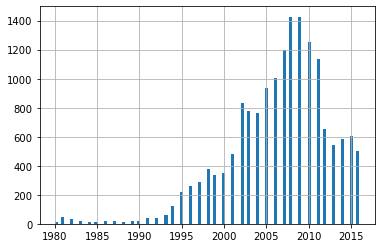

In [15]:

plt.hist(games['year_of_release'],bins=100)
plt.grid()

In [16]:
len(games[games['year_of_release'].isna()])

269

In [17]:
games.dropna(subset=['year_of_release'], inplace=True)
games=games.reset_index(drop=True)

In [18]:
len(games[games['year_of_release'].isna()])

0

В столбце year_of_release пропущено 269 значений. Удалим эти строки.

In [19]:
games['year_of_release']=games['year_of_release'].fillna(0)
len(games[games['year_of_release'].isna()])

0

critic_score и user_score

In [20]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

В столбце critic_score заменим пропуски нулями и приведем данные к цельночисловому типу

In [21]:
games['critic_score']=games['critic_score'].fillna(0)
len(games[games['critic_score'].isna()])

0

In [22]:
games['critic_score']=games['critic_score'].astype (int)

В столбце user_score заменим пропуски нулями для того чтобы впроследствии изменить тип данных на числовой.

In [23]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Прежде чем заменить пропуски нулями - посмотрим на данные, в которых пользовательский рейтинг изначально был ноль. 

In [24]:
games[games['user_score']=='0']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2797,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,0,0,E


Изначально ноль в столбце пользовательского рейтинга встречается один раз и этими данными можно пренебречь, они не повлияют на корректность дальнейшего анализа. Таким образом можем пропуски также заменить нулями, что позволит нам, при необходимости отфильтровать данные с ненулевыми значениями.

In [25]:
games['user_score']=games['user_score'].fillna(0)
len(games[games['user_score'].isna()])

0

In [26]:
games['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [27]:
len(games[games['user_score']=='tbd'])

2376

In [28]:
games[games['user_score']=='tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,0,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
516,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,0,tbd,T
639,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71,tbd,E
709,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,0,tbd,E


В столбце user_score есть нечисловое значение 'tbd', встречающееся 2424 раза, что видимо означает to be desided или to be defined.Возможно 'tbd' присваивается играм у которых слишком мало пользовательских оценок чтобы сформировать рейтинг. Следовательно если рейтинг не опроеделен - заменяем tbd нулями.

In [29]:
games.loc[(games.user_score == 'tbd'), 'user_score'] = 0

In [30]:
games['user_score']=games['user_score'].astype (float)

Сдвинем запятую, приведя формат рейтинга к двухзначным числам по аналогии с critic_score и переведем к цельночисловому виду

In [31]:
games['user_score']=games['user_score']*10

In [32]:
games['user_score']=games['user_score'].astype (int)

In [33]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,80,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0,0,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,83,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0,0,NaN


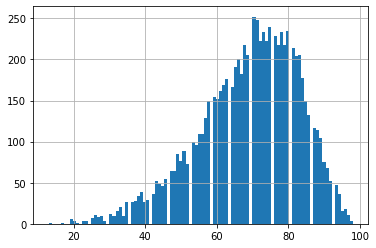

In [34]:
plt.hist(games[games['critic_score']>0]['critic_score'],bins=100)
plt.grid()

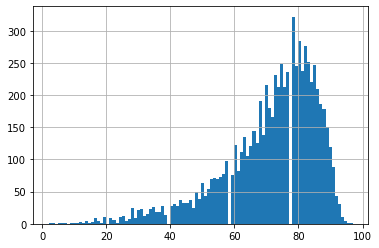

In [35]:
plt.hist(games[games['user_score']>0]['user_score'],bins=100)
plt.grid()

In [36]:
games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0,0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0,0,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,0,0,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,0,0,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0,0,NaN
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0,0,NaN
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0,0,NaN
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0,0,NaN


В столбце rating отсутсвует 40% значений. Пропуски погли возникнуть из-за неккоректного сбора данных. Поскольку в ходе работы нам предстоит анализировать зависимость рейтинга и популярности игр, целесообразно заменить пропуски значением -заглушкой, например, 'unknown'.

In [37]:
games['rating']=games['rating'].fillna('unknown')
len(games[games['rating'].isna()])

0

In [38]:
games['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Добавляем столбец total_sales с суммарными продажами по регионам

In [39]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0,0,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0,0,unknown,31.38


**Шаг 3. Исследовательский анализ данных**

Анализ количества выпускаемых игр по годам. Построим диаграмму на основе данных сводной таблицы.

<AxesSubplot:xlabel='year_of_release'>

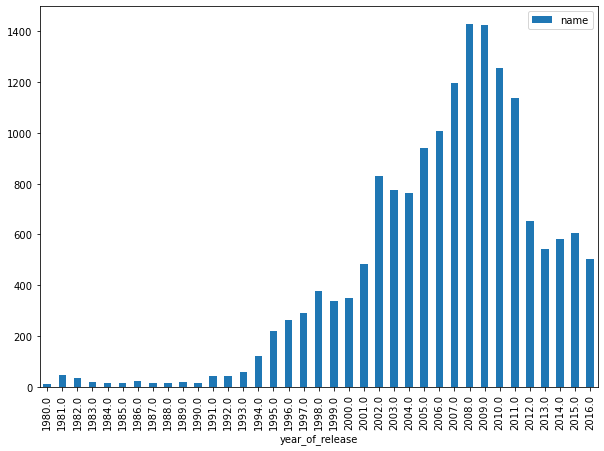

In [40]:
games.pivot_table(index='year_of_release',values='name',
                  aggfunc='count').reset_index().plot(x='year_of_release',kind='bar', figsize=(10,7))

Начиная примерно с 2002 по 2011 года в индустрии наблюдался резкий скачек выхода новых игр, с последующей коррекцией и начиная с 2012 по 2016 года количество выпускаемых игр стабильно на уровне около 500-600 в год. Для прогноза на 2017 год лучше подойдет период после коррекции.

Динамика продаж по платформам

In [41]:
games_pivot=games.pivot_table(index='platform', 
                             values='total_sales', 
                             columns='year_of_release', aggfunc='sum').fillna(0)
games_pivot

year_of_release,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
DC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00
GB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,64.97,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GEN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [42]:
games_pivot_platforms=games.pivot_table(index='year_of_release', 
                             values='total_sales', 
                             columns='platform', aggfunc='sum')
games_pivot_platforms

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980.0,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983.0,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984.0,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986.0,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987.0,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988.0,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посчитаем среднее количество лет продаж для платформ, добавив количество лет с ненулевыми продажами для каждой платформы в список lifecircle, после чего посмотрим его среднее и медиану.

In [43]:
lifecircle=[]
for column in games_pivot_platforms:
    lifecircle.append(len(games_pivot_platforms[games_pivot_platforms[column]>0]))
lifecircle

[10,
 2,
 6,
 7,
 11,
 13,
 8,
 7,
 5,
 1,
 7,
 12,
 4,
 26,
 1,
 10,
 12,
 11,
 4,
 12,
 6,
 6,
 2,
 10,
 1,
 3,
 11,
 5,
 12,
 9,
 4]

In [44]:
statistics.mean(lifecircle)

7.67741935483871

In [45]:
statistics.median(lifecircle)

7

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

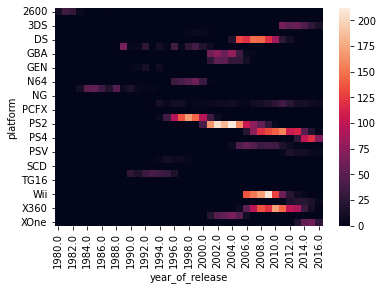

In [46]:
sns.heatmap(games.pivot_table(index='platform', 
                             values='total_sales', 
                             columns='year_of_release', aggfunc='sum').fillna(0))

На тепловой карте видно что пик продаж по платформе в среднем на протяжении 6 лет. После выхода платформы нового поколения продажи на старой постепенно снижаются. Полный срок жизни консоли составляет в среднем около 7-8 лет.

Выбор актуального периода для прогноза на 2012 год.

Как было замечено выше - для прогноза релевантны данные после коррекции 2012 года. Сделаем соответсвующий срез.

In [47]:
games_slice=games[games['year_of_release'] > 2011]

Определение перспективных платформ, построение графика boxplot.

In [48]:
games_slice.pivot_table(index='platform', 
                             values='total_sales', 
                             columns='year_of_release', aggfunc='sum').fillna(0)

year_of_release,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,0.00,0.00,0.00
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.36,113.25,47.76,16.82,3.60
PS4,0.00,25.99,100.00,118.90,69.25
PSP,7.69,3.14,0.24,0.12,0.00
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


По итогам 2016 года платформы с наибольшим количеством релизов - 3DS, PS4, XOne. Хотя и по ним релизы падают с 2014 года.

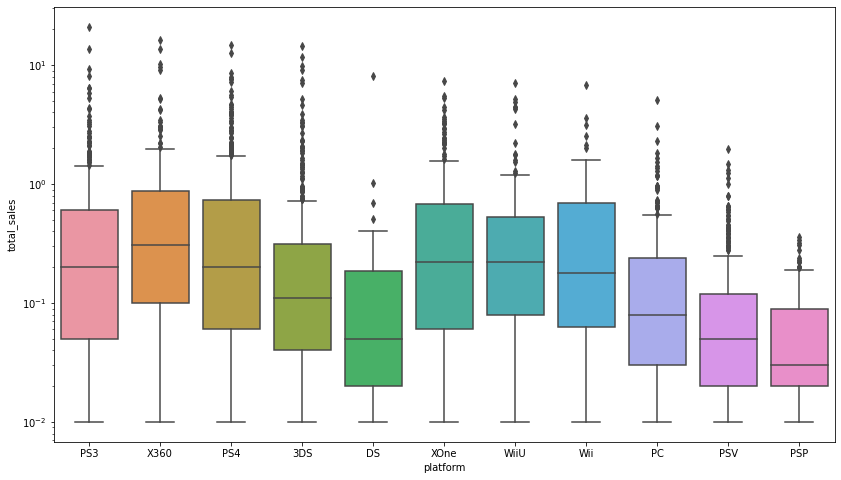

In [49]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(data=games_slice, y="total_sales", x='platform')
ax.set(yscale="log")
plt.show()

В данных много выбросов,видимо это может быть связано с отдельными эксклюзивными или очень популярными играми, выходившими на платформах. 
Значения глобальных продаж по всем платформам сильно скошены вправо. Есть достаточно большое количество игр с очень высокими показателями продажам по сравнению со средними значениями.

Влияние отзывов пользователей и критиков на продажи игр на примере платформы X360.

/var/folders/sy/njgy0zy17gscknx1d7w8d9c00000gn/T/ipykernel_4438/1352783328.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  games_slice[games_slice['platform'] == 'X360'][games_slice['critic_score']>0],


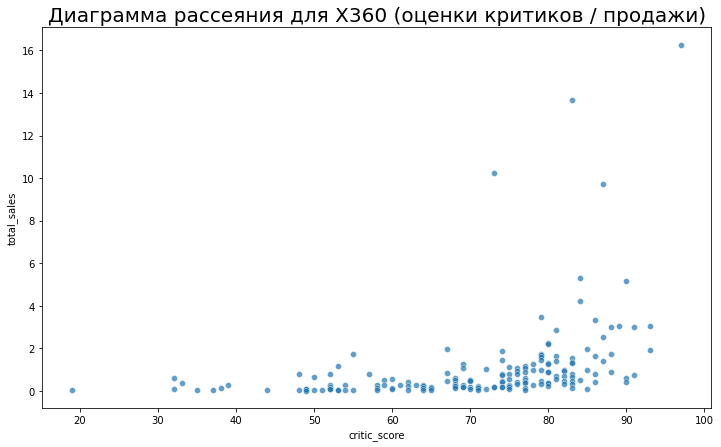

In [50]:
# определим функцию для отрисовки диаграммы рассеяния
def scatter_func(x, y, data, title='NO TITLE'):
    plt.figure(figsize=(12, 7))
    ax = sns.scatterplot(x=x, y=y, data=data, alpha=0.7)
    ax.set_title(title, size=20)
    

# получим диаграмму рассеяния для оценок критиков
scatter_func('critic_score', 
             'total_sales', 
             games_slice[games_slice['platform'] == 'X360'][games_slice['critic_score']>0], 
             'Диаграмма рассеяния для X360 (оценки критиков / продажи)')


/var/folders/sy/njgy0zy17gscknx1d7w8d9c00000gn/T/ipykernel_4438/132628321.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  games_slice[games_slice['platform'] == 'X360'][games_slice['user_score']>0],


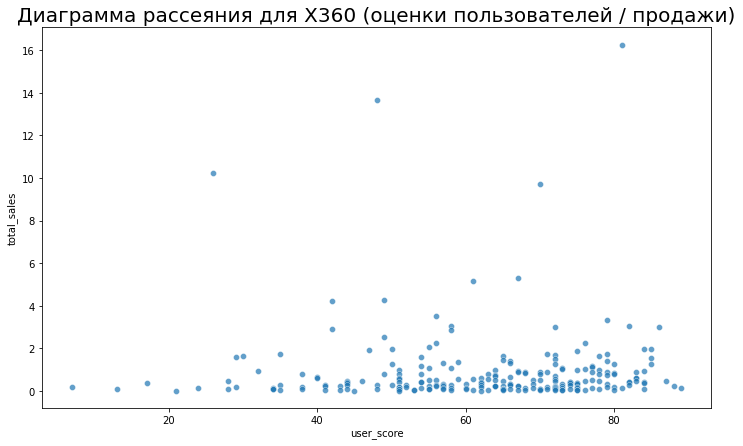

In [51]:
scatter_func('user_score', 
             'total_sales', 
             games_slice[games_slice['platform'] == 'X360'][games_slice['user_score']>0], 
             'Диаграмма рассеяния для X360 (оценки пользователей / продажи)')

In [52]:
games_slice[games_slice['platform'] == 'X360'][games_slice['user_score']>0][games_slice['critic_score']>0][['total_sales', 'critic_score', 'user_score']].corr()

/var/folders/sy/njgy0zy17gscknx1d7w8d9c00000gn/T/ipykernel_4438/2837826969.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  games_slice[games_slice['platform'] == 'X360'][games_slice['user_score']>0][games_slice['critic_score']>0][['total_sales', 'critic_score', 'user_score']].corr()


,total_sales,critic_score,user_score
total_sales,1.000000,0.360573,-0.002014
critic_score,0.360573,1.000000,0.557352
user_score,-0.002014,0.557352,1.000000


На матрице корреляции и диаграммах рассеяния видна положительная корреляция оценок критиков и продаж.

Оценки пользователей на продажи видимо не влияют.

Также обнаружена положительная корреляция оценок пользователей от оценок критиков.


Проверим полученные выводы на всех платформах.

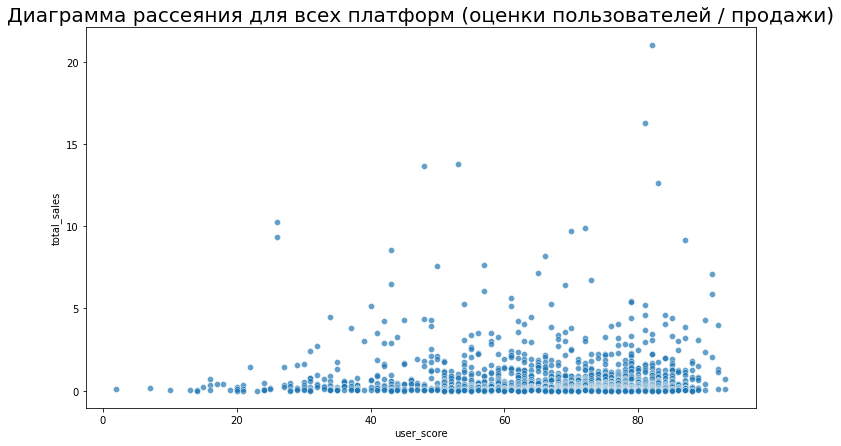

In [53]:
scatter_func('user_score', 
             'total_sales', 
             games_slice[games_slice['user_score']>0], 
             'Диаграмма рассеяния для всех платформ (оценки пользователей / продажи)')

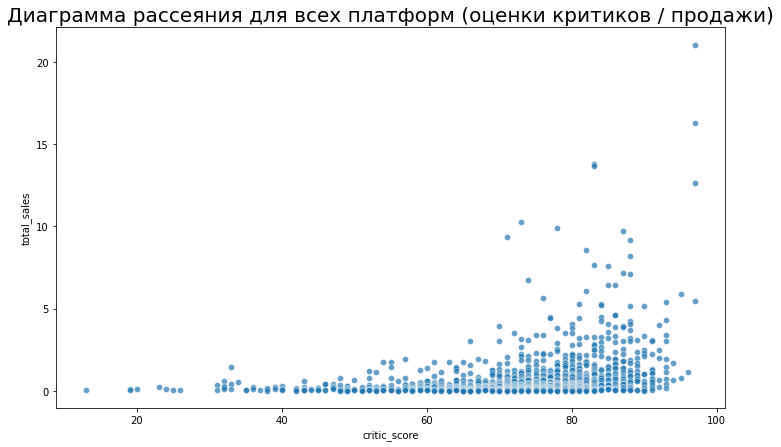

In [54]:
scatter_func('critic_score', 
             'total_sales', 
             games_slice[games_slice['critic_score']>0], 
             'Диаграмма рассеяния для всех платформ (оценки критиков / продажи)')

In [55]:
games_slice[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.248628,0.180131
critic_score,0.248628,1.000000,0.838153
user_score,0.180131,0.838153,1.000000


Вывод: Полученные данные о корреляции в целом актуальны и для других платформ

Анализ общего распределения по жанрам, выявление прибыльных жанров.

Создадим сводрую таблицу суммирующую продажи по жанрам и построим на ее основе диаграмму

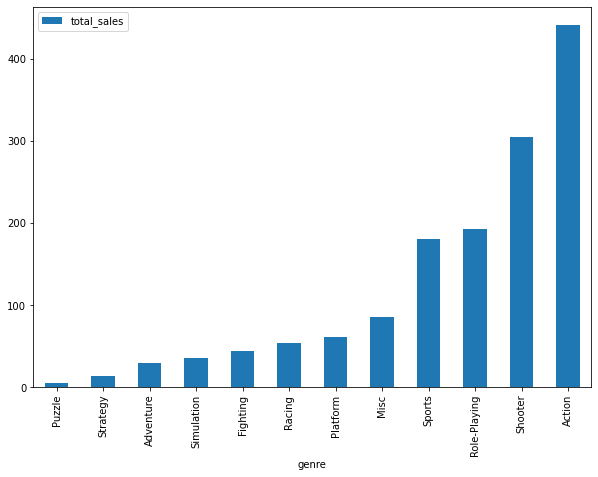

In [56]:
genre_total=games_slice.pivot_table(index='genre', values='total_sales', 
                aggfunc='sum').sort_values(by='total_sales').reset_index().plot(x='genre',
                                                               kind='bar', figsize=(10,7))



Самые продаваемые жанры - Action, Shooter, Role-Playing и Sports. 

Жанр с самыми низкими продажами - Puzzle.

Проанализируем средние и медианные продажи по жанрам.

In [57]:
games_slice.pivot_table(index='genre', values='total_sales', 
                aggfunc='mean').sort_values(by='total_sales',ascending=False).reset_index()

,genre,total_sales
0,Shooter,1.296723
1,Platform,0.717647
2,Sports,0.675634
3,Role-Playing,0.521081
4,Racing,0.465217
5,Misc,0.442917
6,Simulation,0.439000
7,Action,0.427856
8,Fighting,0.408165
9,Strategy,0.187887


In [58]:
games_slice.pivot_table(index='genre', values='total_sales', 
                aggfunc='median').sort_values(by='total_sales',ascending=False).reset_index()

,genre,total_sales
0,Shooter,0.440
1,Sports,0.240
2,Platform,0.210
3,Role-Playing,0.140
4,Racing,0.140
5,Fighting,0.130
6,Action,0.120
7,Misc,0.120
8,Simulation,0.120
9,Strategy,0.080


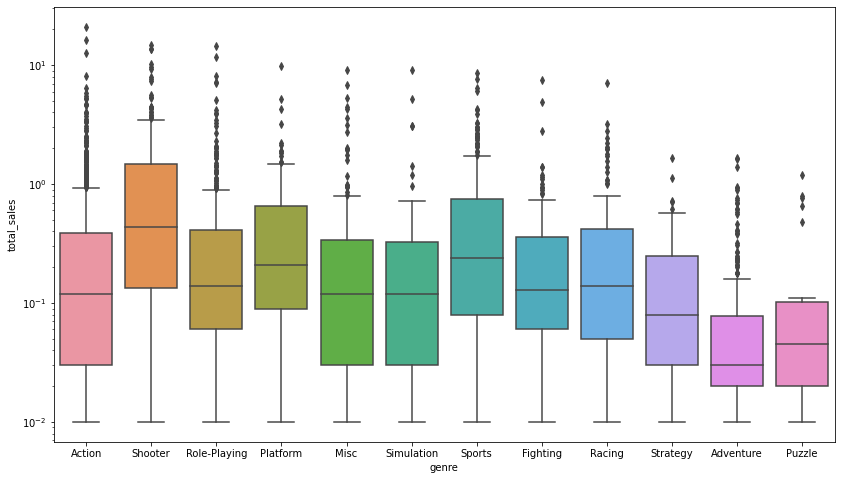

In [59]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(data=games_slice, y="total_sales", x='genre')
ax.set(yscale="log")
plt.show()

**Шаг 4. Составление портрета пользователя каждого региона**

Топ-5 популярных платформ по регионам. Различия в долях продаж.

Создадим датафреймы по регионам. С помощью сводных таблиц проанализируем продажи по платформам, жанрам, рейтингу для каждого датафрейма.

In [60]:
na_games_slice = games_slice.query('na_sales > 0')
na_games_slice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677 entries, 16 to 16407
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1677 non-null   object 
 1   platform         1677 non-null   object 
 2   year_of_release  1677 non-null   float64
 3   genre            1677 non-null   object 
 4   na_sales         1677 non-null   float64
 5   eu_sales         1677 non-null   float64
 6   jp_sales         1677 non-null   float64
 7   other_sales      1677 non-null   float64
 8   critic_score     1677 non-null   int64  
 9   user_score       1677 non-null   int64  
 10  rating           1677 non-null   object 
 11  total_sales      1677 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 170.3+ KB


In [61]:
eu_games_slice = games_slice.query('eu_sales > 0')
eu_games_slice.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1811 entries, 16 to 16421
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1811 non-null   object 
 1   platform         1811 non-null   object 
 2   year_of_release  1811 non-null   float64
 3   genre            1811 non-null   object 
 4   na_sales         1811 non-null   float64
 5   eu_sales         1811 non-null   float64
 6   jp_sales         1811 non-null   float64
 7   other_sales      1811 non-null   float64
 8   critic_score     1811 non-null   int64  
 9   user_score       1811 non-null   int64  
 10  rating           1811 non-null   object 
 11  total_sales      1811 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 183.9+ KB


In [62]:
jp_games_slice = games_slice.query('jp_sales > 0')
jp_games_slice.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1569 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1569 non-null   object 
 1   platform         1569 non-null   object 
 2   year_of_release  1569 non-null   float64
 3   genre            1569 non-null   object 
 4   na_sales         1569 non-null   float64
 5   eu_sales         1569 non-null   float64
 6   jp_sales         1569 non-null   float64
 7   other_sales      1569 non-null   float64
 8   critic_score     1569 non-null   int64  
 9   user_score       1569 non-null   int64  
 10  rating           1569 non-null   object 
 11  total_sales      1569 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 159.4+ KB


In [63]:
na_platform = pd.pivot_table(na_games_slice, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_platform

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31
WiiU,38.10
PC,19.12
Wii,17.45
PSV,10.98


In [64]:
eu_platform = pd.pivot_table(eu_games_slice, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_platform

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64
PC,37.76
WiiU,25.13
Wii,11.92
PSV,11.36


In [65]:
jp_platform = pd.pivot_table(jp_games_slice, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_platform

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01
PSP,10.47
DS,3.72
Wii,3.39
X360,1.57


Рейтинг платформ:

Топ 5 по Северной Америке: X360, PS4, PS3, XOne, 3DS

Топ 5 по Европе: PS4, PS3, XOne, X360, 3DS

Топ 5 по Японии: 3DS, PS3, PSV, PS4, WiiU

Определение топ-5 популярных жанров по регионам

In [66]:
na_genre = pd.pivot_table(na_games_slice, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19
Platform,25.38
Fighting,19.79
Racing,17.22
Adventure,8.92


In [67]:
eu_genre = pd.pivot_table(eu_games_slice, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29
Misc,26.32
Platform,21.41
Simulation,14.55
Fighting,10.79


In [68]:
jp_genre = pd.pivot_table(jp_games_slice, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_genre

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44
Shooter,9.23
Platform,8.63
Adventure,8.24
Sports,8.01


Рейтинг жанров:

Топ 5 по Северной Америке: Action, Shooter, Sports, Role-Playing и Misc

Топ 5 по Европе: Action, Shooter, Sports, Role-Playing и Racing

Топ 5 по Японии: Role-Playing, Action, Misc, Simulation, Fighting.


Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [69]:
na_rating = pd.pivot_table(na_games_slice, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating

,na_sales
rating,
M,231.57
E,114.37
unknown,103.31
E10+,75.70
T,66.02


In [70]:
eu_rating = pd.pivot_table(eu_games_slice, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating

,eu_sales
rating,
M,193.96
E,113.03
unknown,91.50
E10+,55.37
T,52.96


In [71]:
jp_rating = pd.pivot_table(jp_games_slice, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating

,jp_sales
rating,
unknown,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


В Европе и Америке на первом месте по продажам игры с рейтингом 17+, далее идут игры без ограничений, на третьем месте игры, для которых рейтинг не определен, игры для 10+ и 13+  наименее популярны популярны

В Японии ситуация несколько иная - В топе игры, где рейтинг не определен, далее без ограничений, затем с небольшим отрывом - 13+, 17+ только на последнем месте.
Игры, для которых не определен рейтинг, вероятно те, производители которыз не пожелали получать его в ESRB. 
То, что продажи игр без рейтинга высоки в Японии, вероятно объясняется различием в регулировании. В Японии виддимо игры без рейтинга охотнее принимаются розничными магазинами.

**Вывод к шагу 4:**

Портреты игроков по регионам

Американский игрок - от 17 лет, любит X360 и PS4, предпочитает жанры Action, Shooter. 

Европейский игрок - от 17 лет, любит PS4 и PS3, предпочитает жанры Action, Shooter. 

Японский игрок - от 13 лет, любит 3DS или PS3, предпочитает жанры Role-Playing, Action.

**Шаг 5. Проверьте гипотез**

Проверим 2 гипотезы: 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action и Sports разные.

Поскольку выборки можно считать независимыми, для проверки гипотез будем использовать метот Стьюдента. Пороговое значение alpha для обеих проверок зададим 0.05




Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [72]:
#подготовим данные
user_rating_XOne = games_slice.query('platform == "XOne" and user_score>0')['user_score'].dropna()
user_rating_PC = games_slice.query('platform == "PC"and user_score>0')['user_score'].dropna()

In [73]:
user_rating_PC

191      40
455      39
679      79
948      48
1084     79
         ..
16193    68
16239    79
16248    14
16313    79
16421    76
Name: user_score, Length: 206, dtype: int64

In [74]:
alpha = .05

results = st.ttest_ind(user_rating_XOne, user_rating_PC)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643805
Не получилось отвергнуть нулевую гипотезу


Рейтинги схожи, это подтверждает нулевая гипотеза.

Средние пользовательские рейтинги жанров Action и Sports разные.

H0 (нулевая гипотеза) - Средние пользовательские рейтинги жанров Action и Sports одинаковые

Н1 (альтернативная гипотеза) - Средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [75]:
#подготовим данные
user_rating_Action = games_slice.query('genre == "Action"and user_score>0')['user_score'].dropna()
user_rating_Sports = games_slice.query('genre == "Sports"and user_score>0')['user_score'].dropna()

In [76]:
alpha = .05

results = st.ttest_ind(user_rating_Action, user_rating_Sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460930885e-26
Отвергаем нулевую гипотезу


Тест Стьюдента подтвердил что средние пользовательские рейтинги игр с жанрами Action и Sports разные.

Вывод по шагу № 5 - по результату статистического теста первая гипотеза подтвердилась, вторая отвергается.

**Шаг 6. Общий вывод**

В ходе работы был проведен анализ данных из открытых источников о продажах игр, оценках пользователей и экспертов, жанров и платформ. 

**Проведена предобработка датасета** - уделены дубликаты, заполнены пропуски.

**Проведен исследовательский анализ данных.** Начиная примерно с 2002 по 2011 года в индустрии наблюдался резкий скачек выхода новых игр, с последующей коррекцией и начиная с 2012 по 2016 года количество выпускаемых игр стабильно на уровне около 500-600 в год.

Анализ зависимости оценок и продаж показал что продажи зависят от оценок критиков, при этом зависимость от оценок пользователей не подтвердилась.

Самые продаваемые жанры - Shooter, Sports, Platform и Role-Playing.

**Построены портреты типичных пользователей.** 

Американский игрок - от 17 лет, любит X360 и PS4, предпочитает жанры Action, Shooter. 

Европейский игрок - от 17 лет, любит PS4 и PS3, предпочитает жанры Action, Shooter. 

Японский игрок - от 13 лет, любит 3DS или PS3, предпочитает жанры Role-Playing, Action.


**Проверены гипотезы.** Тест Стьюдента подтвердил, что 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action и Sports разные.

